# Ch4 Recreate a NN with in steps
## Hard Coding Neural Nets on the basis of a linear regression

The aim of this spreadsheet is to hard code all the steps needed 
 - to solve a linear regression and
 - a neural net

The data will be data about coffee quality. It was  gathered by Coffee Quality Institute's trained reviewers and consists of 1311 rows and 44 columns.

"","Species","Owner","Country.of.Origin","Farm.Name","Lot.Number","Mill","ICO.Number","Company","Altitude","Region","Producer","Number.of.Bags","Bag.Weight","In.Country.Partner","Harvest.Year","Grading.Date","Owner.1","Variety","Processing.Method","Aroma","Flavor","Aftertaste","Acidity","Body","Balance","Uniformity","Clean.Cup","Sweetness","Cupper.Points","Total.Cup.Points","Moisture","Category.One.Defects","Quakers","Color","Category.Two.Defects","Expiration","Certification.Body","Certification.Address","Certification.Contact","unit_of_measurement","altitude_low_meters","altitude_high_meters","altitude_mean_meters"

The goal is to predict some of the variables which describe taste, like "Acidity","Flavor","Aroma". 

To incorporate some aspects of the chapter on ethics, it might be a good idea to not include some of the columns, like the owner. 

To see an overview of the data visit this github repository: https://github.com/jldbc/coffee-quality-database

Raw Data to download: 
https://raw.githubusercontent.com/jldbc/coffee-quality-database/master/data/arabica_data_cleaned.csv

The formula for ordinary least squares with multiple variables is: 

beta = (X'X)^-1 X'y

whereas X is the Array with all dependent variables and an constant vector and y is the dependent variable. 

In [1]:
import pandas as pd 
df = pd.read_csv("https://raw.githubusercontent.com/jldbc/coffee-quality-database/master/data/arabica_data_cleaned.csv")
df.describe()

,Unnamed: 0,Number.of.Bags,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean.Cup,Sweetness,Cupper.Points,Total.Cup.Points,Moisture,Category.One.Defects,Quakers,Category.Two.Defects,altitude_low_meters,altitude_high_meters,altitude_mean_meters
count,1311.000000,1311.000000,1311.000000,1311.000000,1311.000000,1311.000000,1311.000000,1311.000000,1311.000000,1311.00000,1311.000000,1311.000000,1311.000000,1311.000000,1311.000000,1310.000000,1311.000000,1084.000000,1084.000000,1084.000000
mean,656.000763,153.887872,7.563806,7.518070,7.397696,7.533112,7.517727,7.517506,9.833394,9.83312,9.903272,7.497864,82.115927,0.088863,0.426392,0.177099,3.591915,1759.548954,1808.843803,1784.196379
std,378.598733,129.733734,0.378666,0.399979,0.405119,0.381599,0.359213,0.406316,0.559343,0.77135,0.530832,0.474610,3.515761,0.047957,1.832415,0.840583,5.350371,8767.847252,8767.187498,8767.016913
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,328.500000,14.500000,7.420000,7.330000,7.250000,7.330000,7.330000,7.330000,10.000000,10.00000,10.000000,7.250000,81.170000,0.090000,0.000000,0.000000,0.000000,1100.000000,1100.000000,1100.000000
50%,656.000000,175.000000,7.580000,7.580000,7.420000,7.500000,7.500000,7.500000,10.000000,10.00000,10.000000,7.500000,82.500000,0.110000,0.000000,0.000000,2.000000,1310.640000,1350.000000,1310.640000
75%,983.500000,275.000000,7.750000,7.750000,7.580000,7.750000,7.670000,7.750000,10.000000,10.00000,10.000000,7.750000,83.670000,0.120000,0.000000,0.000000,4.000000,1600.000000,1650.000000,1600.000000
max,1312.000000,1062.000000,8.750000,8.830000,8.670000,8.750000,8.580000,8.750000,10.000000,10.00000,10.000000,10.000000,90.580000,0.280000,31.000000,11.000000,55.000000,190164.000000,190164.000000,190164.000000


In [2]:
df.shape

(1311, 44)

The linear regression model should have the form: flavor ~ acidity + body + balance + uniformity.
This does mean that we want to explain flavur through the oder variables. 

Therefore X = [constant,acidity,body,balance,uniformity] and y = [flavor]

In [17]:
df["Aroma"].value_counts().head()

Aroma
7.67    173
7.50    163
7.58    149
7.75    122
7.42    121
Name: count, dtype: int64

In [24]:
lmdf = df[["Flavor","Acidity","Body","Balance","Uniformity"]].query("Body > 0")
lmdf.shape

(1310, 5)

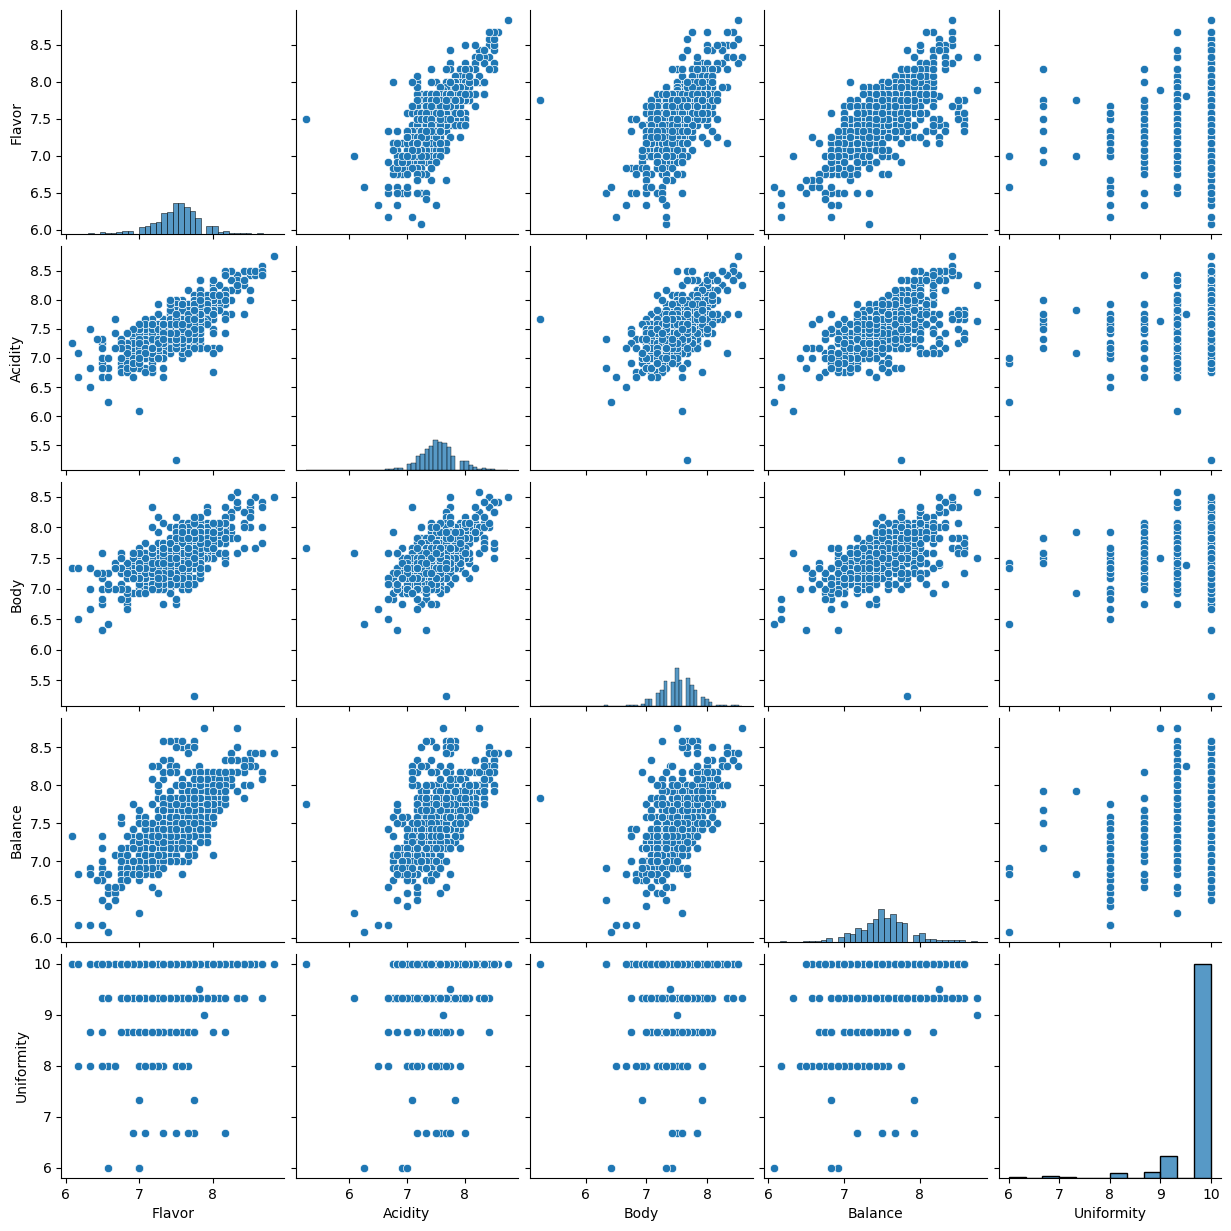

In [22]:
import seaborn as sbs
sbs.pairplot(lmdf)

In [41]:
import numpy as np

const = np.ones(len(lmdf))
lmdf["const"] = const
y = np.array(lmdf["Flavor"])
X = np.array(lmdf.drop(columns="Flavor"))
X

array([[ 8.75,  8.5 ,  8.42, 10.  ,  1.  ],
       [ 8.58,  8.42,  8.42, 10.  ,  1.  ],
       [ 8.42,  8.33,  8.42, 10.  ,  1.  ],
       ...,
       [ 6.67,  7.08,  6.67,  9.33,  1.  ],
       [ 6.25,  6.42,  6.08,  6.  ,  1.  ],
       [ 7.67,  7.33,  6.67,  8.  ,  1.  ]])

Remember: 
$
(X'X)^{-1} X'y
$

In [42]:
coeffs = np.matmul(np.power(np.matmul(X.T,X),-1),np.matmul(X.T,y))
coeffs

array([ 4.99025048,  5.00094984,  4.99987979,  3.82364805, 37.65380099])

# Now: trying out SDG

In [51]:
# params = random coefficients which will be fine tuned 
params = [3,1,4,6,4]
linear = np.multiply(X,params).sum(axis=1) #corresponds to the "linear" col in the video
loss = y-linear
total_loss = loss.sum()
total_loss

-151638.56